# 🧫 Estudio de Características de Entrada (Features) / Variables Independientes

## E_peak, Beta, Beta_rel, Sigma_d 🔭

In [160]:
%matplotlib inline

In [161]:
import pandas as pd

In [162]:
# Definir nombres de las columnas
columnas = ['E_peak', 'beta', 'sigma', 'beta_Rel', 'astro_DM']

# Cargar los datos
df = pd.read_csv('XY_bal_log_Rel.txt', sep="\s+", names=columnas, engine='python', skiprows=1)

In [163]:
# Ver los primeros valores para verificar la estructura
print("🔹 Primeras filas del DataFrame:")
print(df.head())

🔹 Primeras filas del DataFrame:
     E_peak      beta     sigma  beta_Rel  astro_DM
0 -0.412502 -1.325139  1.356951 -0.122193       0.0
1  0.708140 -0.000174  0.623167 -1.601886       0.0
2  0.224740 -0.581202  1.010041 -0.311249       0.0
3  0.257319 -0.561933  0.615413 -0.038913       0.0
4  0.326110 -1.100179  1.624932 -0.528753       0.0


In [164]:
# Convertir las columnas a tipo numérico, eliminando valores erróneos
for col in ['E_peak', 'beta', 'sigma', 'beta_Rel', 'astro_DM']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar valores NaN que puedan haberse generado
df = df.dropna()

# Verificar si `E_peak` y `beta` tienen valores negativos
print("\n🔹 Cantidad de valores negativos en `E_peak`:", (df['E_peak'] < 0).sum())
print("🔹 Cantidad de valores negativos en `beta`:", (df['beta'] < 0).sum())


🔹 Cantidad de valores negativos en `E_peak`: 1556
🔹 Cantidad de valores negativos en `beta`: 5654


In [165]:
# Aplicar transformación si los datos están en `ln` en lugar de `log10`
if (df['E_peak'] < 0).sum() > 0 or (df['beta'] < 0).sum() > 0:
    print("\n⚠️  Advertencia: Los valores de `E_peak` y `beta` incluyen negativos. Asumiendo que están en `ln`, aplicando `exp()` antes de `log10`.")
    df['E_peak'] = np.exp(df['E_peak'])  # Convertir de ln a escala normal
    df['beta'] = np.exp(df['beta'])  # Convertir de ln a escala normal


⚠️  Advertencia: Los valores de `E_peak` y `beta` incluyen negativos. Asumiendo que están en `ln`, aplicando `exp()` antes de `log10`.


In [166]:
# Muestra aleatoria de 5 filas
df.sample(5)

,E_peak,beta,sigma,beta_Rel,astro_DM
2643,0.968563,0.565294,2.071695,-1.228194,0.0
4294,3.972142,0.644977,1.523746,-0.202763,1.0
4563,39.863974,0.191051,1.648458,-0.085430,1.0
3971,2.464400,0.420571,1.621695,-0.108962,1.0
1733,0.498132,0.309151,1.235094,-0.145739,0.0


In [167]:
# Ver estadísticas generales (valores mínimos, máximos, media, desviación estandar, etc.)
print("Estadísticas descriptivas:")
df.describe()

Estadísticas descriptivas:


,E_peak,beta,sigma,beta_Rel,astro_DM
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,8.815194,0.477735,1.061131,-0.061574,0.500000
std,15.060537,0.185320,0.357026,0.478845,0.500044
min,0.002707,0.074121,0.608098,-3.198657,0.000000
25%,0.916897,0.334932,0.778414,-0.301915,0.000000
50%,2.419036,0.447057,0.973677,-0.045029,0.500000
75%,10.002327,0.604734,1.254676,0.287035,1.000000
max,371.854311,1.000000,2.899104,1.866966,1.000000


In [168]:
# Ver los valores de correlación entre variables
print("Matriz de correlación entre variables:")
df.corr()

Matriz de correlación entre variables:


,E_peak,beta,sigma,beta_Rel,astro_DM
E_peak,1.000000,-0.111144,-0.069624,0.368473,0.432350
beta,-0.111144,1.000000,-0.116798,-0.266054,0.267154
sigma,-0.069624,-0.116798,1.000000,-0.347368,-0.143709
beta_Rel,0.368473,-0.266054,-0.347368,1.000000,0.329702
astro_DM,0.432350,0.267154,-0.143709,0.329702,1.000000


In [169]:
# Aplicar logaritmo
df = df[(df['E_peak'] > 0) & (df['beta'] > 0)]  # Filtrar valores negativos antes de `log10`
df['log_E_peak'] = np.log10(df['E_peak'])
df['log_beta'] = np.log10(df['beta'])

# Gráfica comparativa de escalas
Lo utilizamos para ayudar a ver cómo se transformaron los datos desde ln → escala normal → log10

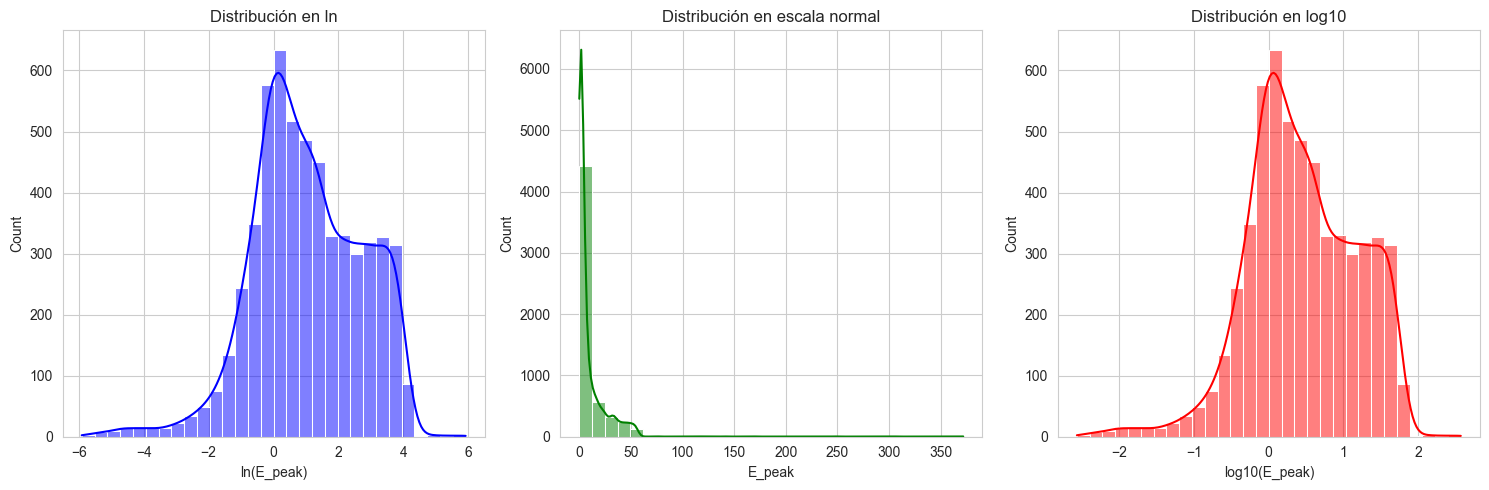

In [170]:

# Crear un subconjunto de los datos originales en `ln`
df_ln = df.copy()
df_ln['E_peak_ln'] = np.log(df_ln['E_peak'])  # Simular datos en ln
df_ln['beta_ln'] = np.log(df_ln['beta'])

# Restaurar datos en escala normal (exp)
df_normal = df_ln.copy()
df_normal['E_peak_exp'] = np.exp(df_ln['E_peak_ln'])
df_normal['beta_exp'] = np.exp(df_ln['beta_ln'])

# Aplicar log10 a los datos normalizados
df_log10 = df_normal.copy()
df_log10['E_peak_log10'] = np.log10(df_normal['E_peak_exp'])
df_log10['beta_log10'] = np.log10(df_normal['beta_exp'])

# Graficar la evolución de los valores en cada transformación
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df_ln['E_peak_ln'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución en ln')
axes[0].set_xlabel('ln(E_peak)')

sns.histplot(df_normal['E_peak_exp'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución en escala normal')
axes[1].set_xlabel('E_peak')

sns.histplot(df_log10['E_peak_log10'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribución en log10')
axes[2].set_xlabel('log10(E_peak)')

plt.tight_layout()
plt.show()

# Gráficas exploratorias principales

## 📌 Beta-plot (𝐸 peak vs β)
Separa distintas clases de fuentes según sus características espectrales y muestra cómo se distribuyen las fuentes astrofísicas y de materia oscura en este espacio.

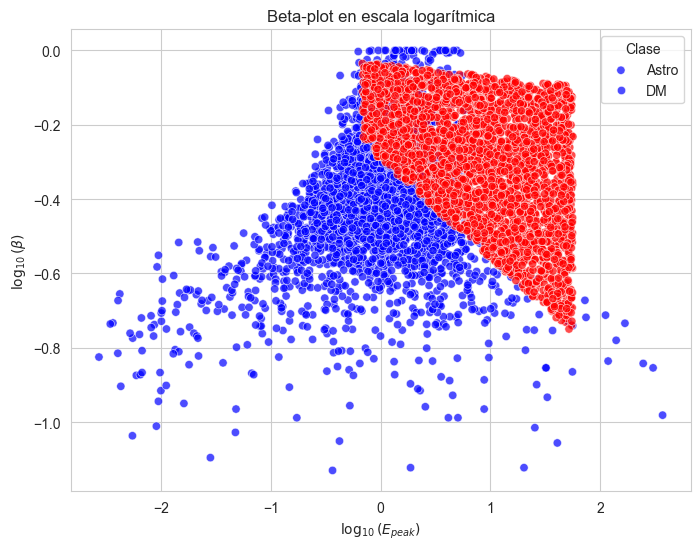

In [171]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='log_E_peak', y='log_beta', hue='astro_DM', alpha=0.7, palette=['blue', 'red'])
plt.xlabel(r'$\log_{10}(E_{peak})$')
plt.ylabel(r'$\log_{10}(\beta)$')
plt.title('Beta-plot en escala logarítmica')
plt.legend(title="Clase", labels=["Astro", "DM"])
plt.show()

## 📌 Scatter `beta_Rel` vs `sigma`

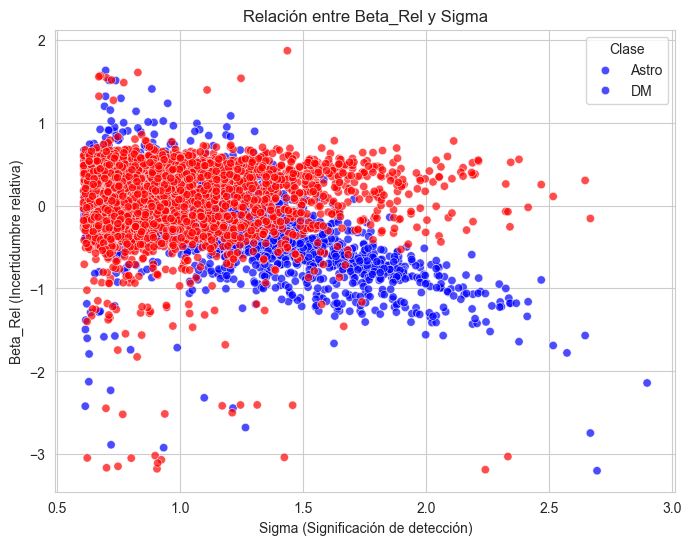

In [172]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sigma', y='beta_Rel', hue='astro_DM', alpha=0.7, palette=['blue', 'red'])
plt.xlabel('Sigma (Significación de detección)')
plt.ylabel('Beta_Rel (Incertidumbre relativa)')
plt.title('Relación entre Beta_Rel y Sigma')
plt.legend(title="Clase", labels=["Astro", "DM"])
plt.show()

## 📌 Histogramas de cada variable

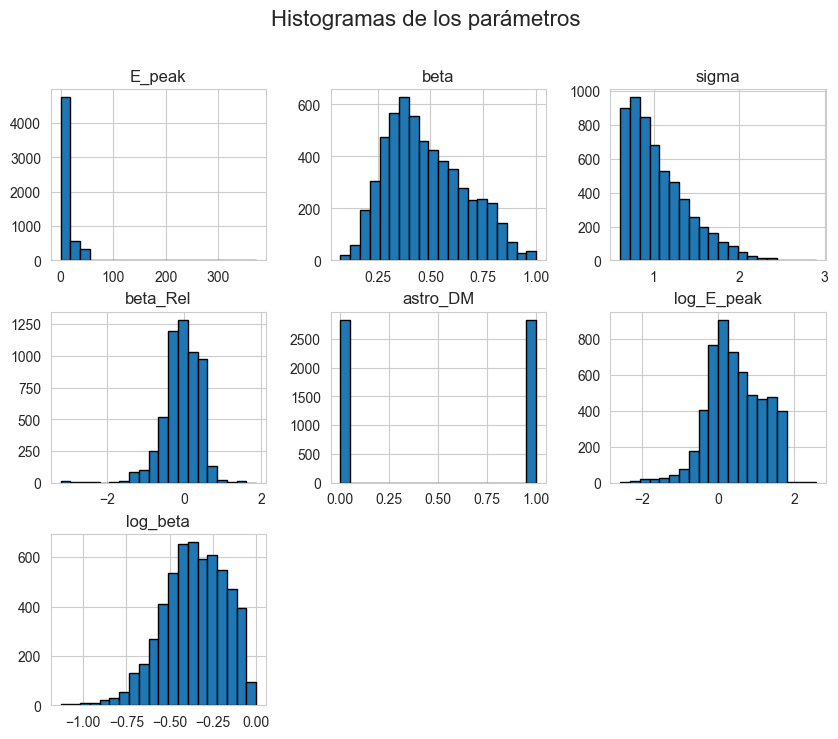

In [173]:
df.hist(figsize=(10,8), bins=20, edgecolor='black')
plt.suptitle('Histogramas de los parámetros', fontsize=16)
plt.show()

## 📌 Matriz de correlación

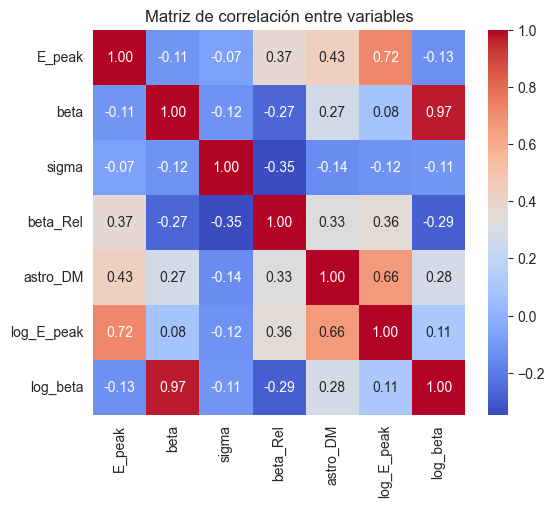

In [174]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()

## 📌 Pairplot de todas las variables clave

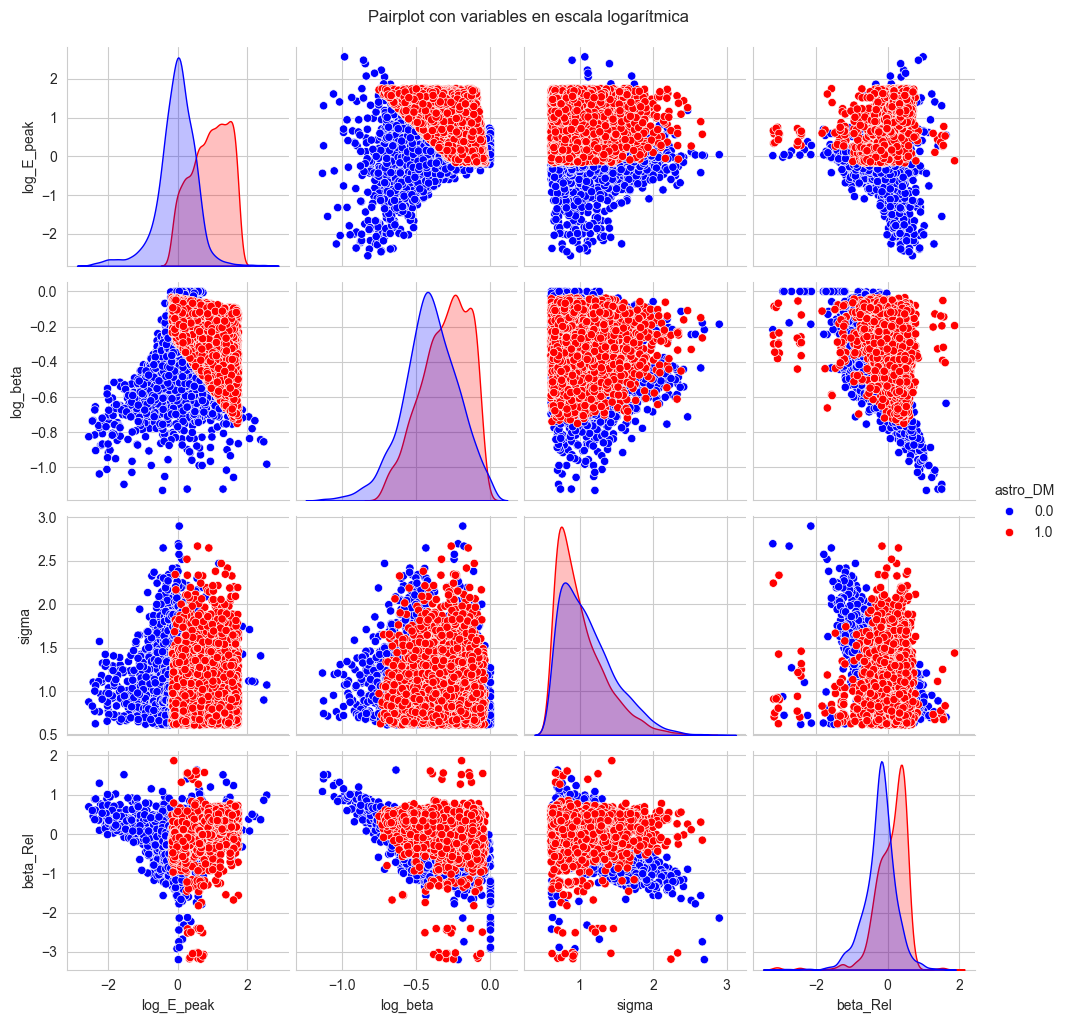

In [175]:
sns.pairplot(df[['log_E_peak', 'log_beta', 'sigma', 'beta_Rel', 'astro_DM']], hue="astro_DM", diag_kind='kde', palette=['blue', 'red'])
plt.suptitle('Pairplot con variables en escala logarítmica', y=1.02)
plt.show()